In [ ]:
import pandas as pd
import numpy as np

### buy and hold
1. 결측치 및 이상치를 조회 및 삭제
2. 종가를 기준으로 수익율 측정 
3. 일별 수익율 파생변수 
4. CAGR, MDD, VOL, sharpe를 출력

In [ ]:
## 데이터 로드 
df = pd.read_csv("../csv/AAPL.csv", index_col='Date')
df.head(2)

In [ ]:
## 결측치 및 이상치를 조회
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [7]:
## 결측치 및 이상치를 제외한 데이터를 출력
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [12]:
## 종가만 사용 (Adj Close) 

#case1
# df[["Adj Close"]]

#case2
price_df = df.loc[:, ["Adj Close"]]

<AxesSubplot:xlabel='Date'>

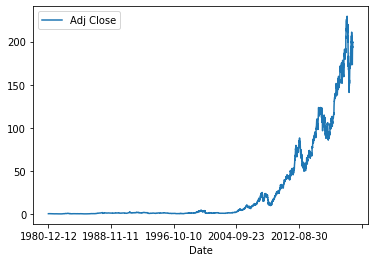

In [13]:
price_df.plot()

In [18]:
## 일별 수익율 생성
## (오늘 날짜의 종가 - 어제 날짜의 종가) / 어제 날짜의 종가
# daily_rtn 파생변수로 생성

# case1 diff(), shift()
price_df['Adj Close'].diff() / price_df['Adj Close'].shift()

# case2 shift()
(price_df['Adj Close'] - price_df["Adj Close"].shift()) / price_df['Adj Close'].shift()

# case3 pct_change()
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()

In [19]:
price_df.head(10)

,Adj Close,daily_rtn
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,-0.052175
1980-12-16,0.360548,-0.073394
1980-12-17,0.369472,0.024751
1980-12-18,0.380182,0.028987
1980-12-19,0.403385,0.061031
1980-12-22,0.423019,0.048673
1980-12-23,0.440868,0.042194
1980-12-24,0.464072,0.052633


In [22]:
## 일별 수익율 가지고 총 수익율을 구하려면?
## 누적곱 cumprod()
## st_rtn 파생변수 생성
price_df['st_rtn'] = (1 + price_df['daily_rtn']).cumprod()

In [ ]:
price_df.head(10)

<AxesSubplot:xlabel='Date'>

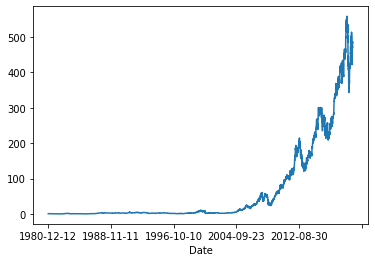

In [24]:
price_df['st_rtn'].plot()

In [28]:
## 종가를 기준으로 수익율 계산
# 마지막 데이터의 종가 / 처음 데이터의 종가
# 데이터프레임.index --> list 형태의 데이터가 출력
# list형태의 데이터에서 첫번째 원소가 구매일, list 마지막 원소가 판매일
# 데이터프레임 필터링 판매일에 종가 / 구매일의 종가 --> 수익율 
price_df.index
first_date = price_df.index[0]
last_date = price_df.index[-1]

## 구매일에 종가 출력
price_df.loc[last_date, 'Adj Close'] / price_df.loc[first_date, 'Adj Close']


485.15924243346933

In [29]:

## 누적 수익율 출력
price_df.loc[last_date, 'st_rtn']

485.15924243347024

In [25]:
a = [1,2,3,4,5]
## 변수명[index] --> index 위치의 데이터가 출력
# list 데이터에서 첫번째 값 출력
print(a[0])
# list 데이터에서 마지막 값 출력
print(a[-1])

1
5
